<a href="https://colab.research.google.com/github/sakshi672/migraine-prediction/blob/main/migraine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics

In [ ]:
mig=pd.read_csv('data.csv')

In [ ]:
mig.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [ ]:
mig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [ ]:
mig['Type'].value_counts()

Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: Type, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

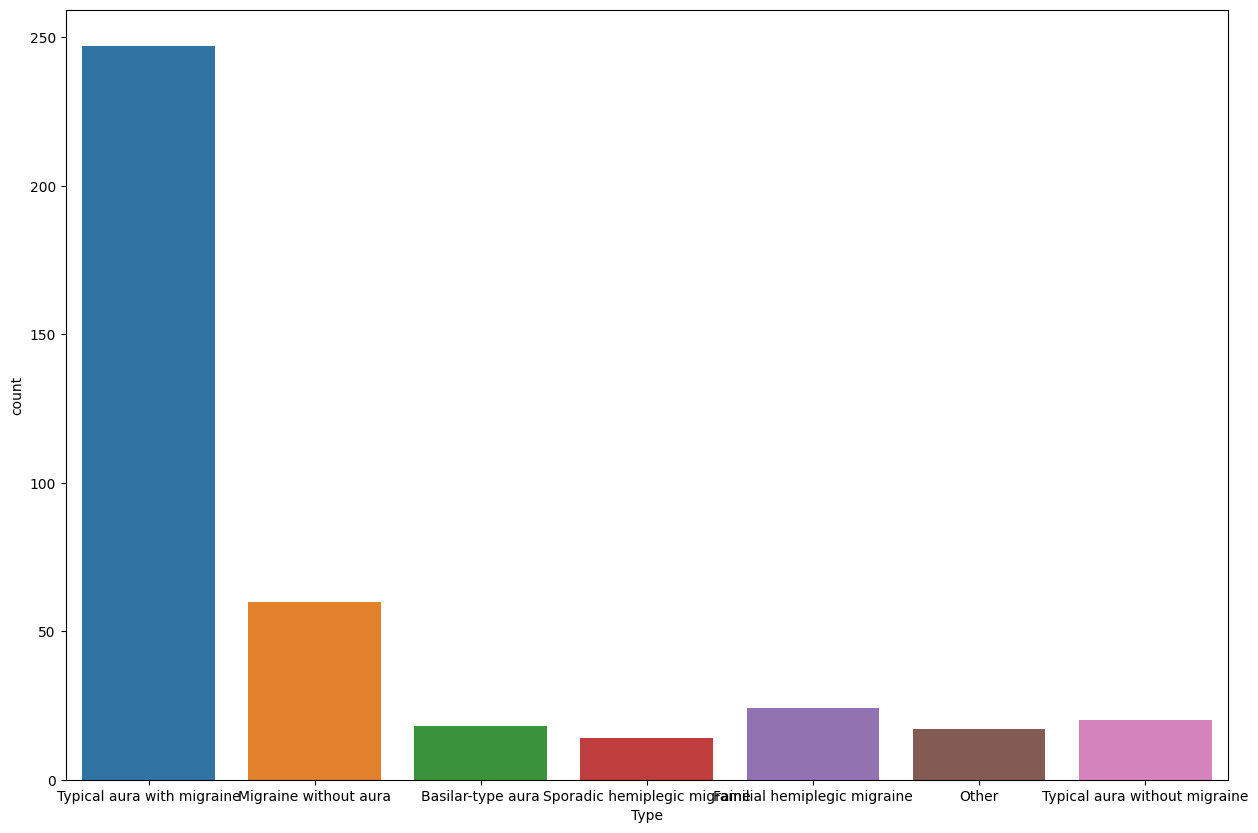

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=mig['Type'])

In [ ]:
mig['Type'].unique()

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

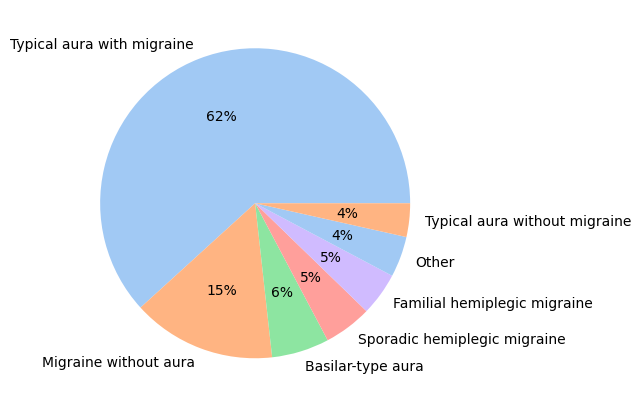

In [ ]:
plt.figure(figsize=(5, 8))
data = mig['Type'].value_counts()
labels =['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine']

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

(array([93., 91., 61., 52., 35., 43., 18.,  2.,  4.,  1.]),
 array([15. , 21.2, 27.4, 33.6, 39.8, 46. , 52.2, 58.4, 64.6, 70.8, 77. ]),
 <BarContainer object of 10 artists>)

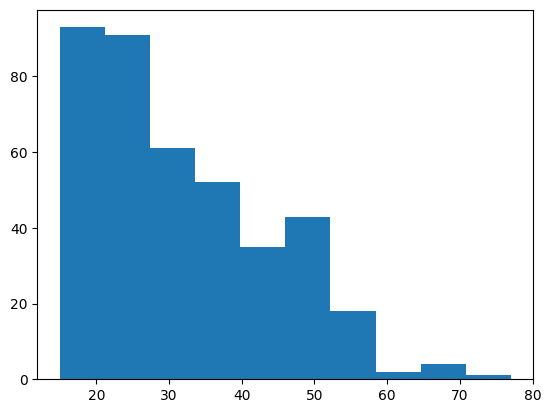

In [ ]:
plt.hist(mig['Age'])

In [ ]:
mig.isna().value_counts

<bound method DataFrame.value_counts of        Age  Duration  Frequency  Location  Character  Intensity  Nausea  \
0    False     False      False     False      False      False   False   
1    False     False      False     False      False      False   False   
2    False     False      False     False      False      False   False   
3    False     False      False     False      False      False   False   
4    False     False      False     False      False      False   False   
..     ...       ...        ...       ...        ...        ...     ...   
395  False     False      False     False      False      False   False   
396  False     False      False     False      False      False   False   
397  False     False      False     False      False      False   False   
398  False     False      False     False      False      False   False   
399  False     False      False     False      False      False   False   

     Vomit  Phonophobia  Photophobia  ...  Vertigo  Tinnitu

In [ ]:
mig.isna()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [ ]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(mig[['Type']])
mig[ohe.categories_[0]] = transformed.toarray()
mig.drop(['Type'],axis=1,inplace=True)

In [ ]:
mig.tail()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Conscience,Paresthesia,DPF,Basilar-type aura,Familial hemiplegic migraine,Migraine without aura,Other,Sporadic hemiplegic migraine,Typical aura with migraine,Typical aura without migraine
395,39,1,1,1,1,3,1,1,1,1,...,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
396,20,3,2,1,1,3,1,0,1,1,...,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
397,28,3,2,1,1,3,1,0,1,1,...,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
398,20,3,1,1,1,3,1,0,1,1,...,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
399,37,1,1,1,1,3,1,1,1,1,...,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

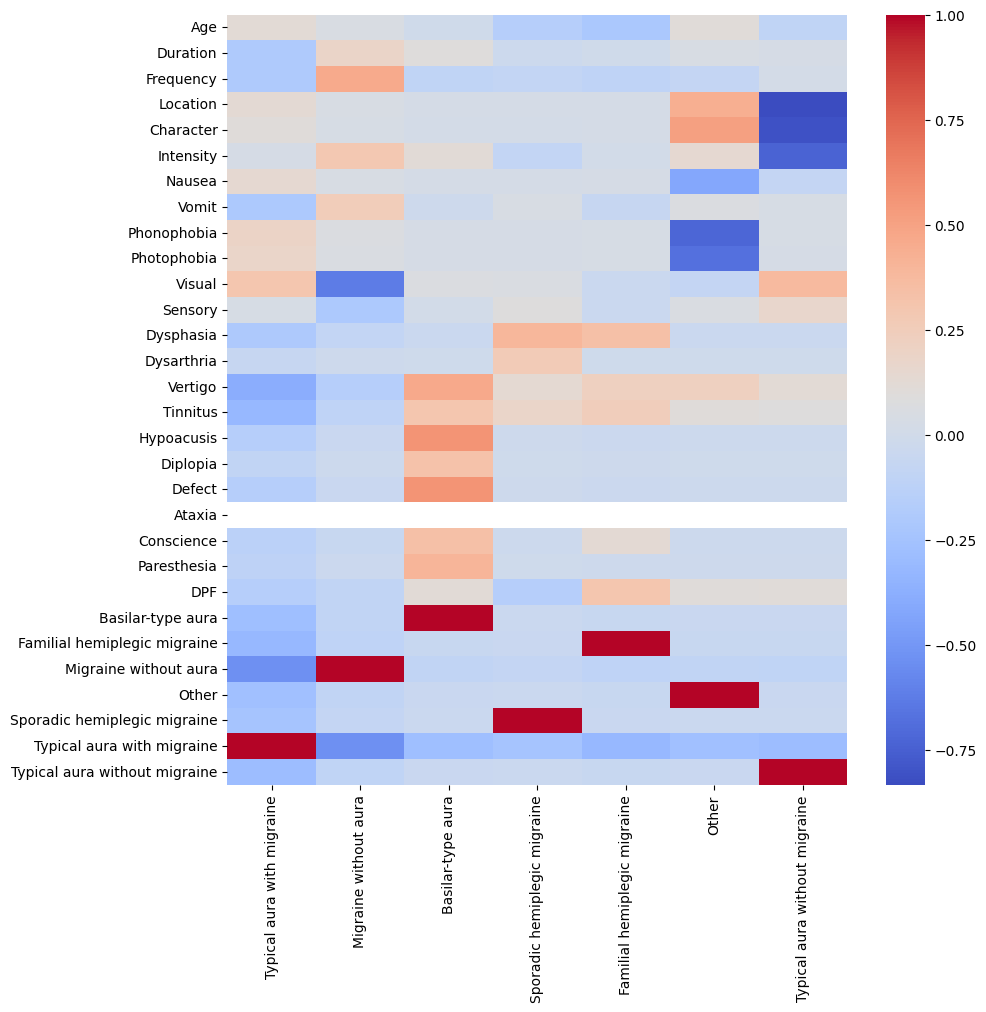

In [ ]:
corr = mig.corr()[['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine']]
plt.figure(figsize=(10,10))
sns.heatmap(data=corr, cmap='coolwarm')

In [ ]:
mig.isnull().sum()

Age                              0
Duration                         0
Frequency                        0
Location                         0
Character                        0
Intensity                        0
Nausea                           0
Vomit                            0
Phonophobia                      0
Photophobia                      0
Visual                           0
Sensory                          0
Dysphasia                        0
Dysarthria                       0
Vertigo                          0
Tinnitus                         0
Hypoacusis                       0
Diplopia                         0
Defect                           0
Ataxia                           0
Conscience                       0
Paresthesia                      0
DPF                              0
Basilar-type aura                0
Familial hemiplegic migraine     0
Migraine without aura            0
Other                            0
Sporadic hemiplegic migraine     0
Typical aura with mi

In [ ]:
mig.Ataxia.value_counts()

0    400
Name: Ataxia, dtype: int64

In [ ]:
X = mig.drop(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'],axis=1)
y= mig[['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine']]

In [ ]:
y.head()

,Typical aura with migraine,Migraine without aura,Basilar-type aura,Sporadic hemiplegic migraine,Familial hemiplegic migraine,Other,Typical aura without migraine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scal=StandardScaler()

In [ ]:
x=pd.DataFrame(scal.fit_transform(X))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
ovr_classifier=MultiOutputClassifier(SVC())
ovr_classifier.fit(x_train,y_train)
p=ovr_classifier.predict(x_test)
print('Accuracy of SVC on training dataset:', ovr_classifier.score(x_train, y_train))
print('Accuracy of SVC on test dataset:', ovr_classifier.score(x_test,y_test))


Accuracy of SVC on training dataset: 0.928125
Accuracy of SVC on test dataset: 0.8625


**RANDOM FOREST**

In [ ]:
rf=RandomForestClassifier(500)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
from sklearn.model_selection import cross_val_score,cross_val_predict
cross_val_score(rf, x_train, y_train, cv=10, scoring="accuracy").mean()

0.8375

In [ ]:
print('Accuracy of Random Forest on training dataset: %.5f' % rf.score(x_train, y_train))
print('Accuracy of Random Forest on test dataset: %.2f' % rf.score(x_test,y_test))

Accuracy of Random Forest on training dataset: 1.00000
Accuracy of Random Forest on test dataset: 0.85


**DECISION TREE**

In [ ]:
dt = DecisionTreeClassifier ()
dt.fit(x_train,y_train)
pred =dt.predict(x_test)
from sklearn.model_selection import cross_val_score,cross_val_predict
cross_val_score(dt, x_train, y_train, cv=10, scoring="accuracy").mean()

0.834375

In [ ]:
print('Accuracy of Decision Tree on training dataset: %.5f' % dt.score(x_train, y_train))
print('Accuracy of Decision Tree on test dataset: %.2f' % dt.score(x_test,y_test))

Accuracy of Decision Tree on training dataset: 1.00000
Accuracy of Decision Tree on test dataset: 0.86


In [ ]:
np.array(y_test.iloc[0])

array([1., 0., 0., 0., 0., 0., 0.])

In [ ]:
mig=pd.read_csv('data.csv')

In [ ]:
data_1 = mig[mig['Type'] == 'Typical aura with migraine']
data_2 = mig[mig['Type'] == 'Migraine without aura']
data_3 = mig[mig['Type'] == 'Familial hemiplegic migraine']
data_4 = mig[mig['Type'] == 'Typical aura without migraine']
data_5 = mig[mig['Type'] == 'Basilar-type aura']
data_6 = mig[mig['Type'] == 'Other']
data_7 = mig[mig['Type'] == 'Sporadic hemiplegic migraine']

In [ ]:
data_1

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,25,3,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
313,39,3,2,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
314,35,3,2,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
316,28,3,3,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine


In [ ]:
mig.shape

(400, 24)

In [ ]:
from sklearn.utils import resample
data_1_resample = resample(data_1, n_samples=150,
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=150,
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=150,
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=150,
                           random_state=123, replace=True)
data_5_resample = resample(data_5, n_samples=150,
                           random_state=123, replace=True)
data_6_resample = resample(data_6, n_samples=150,
                           random_state=123, replace=True)
data_7_resample = resample(data_7, n_samples=150,
                           random_state=123, replace=True)

In [ ]:
train_dataset = pd.concat([data_1, data_2_resample, data_3_resample, data_4_resample,
                          data_5_resample, data_6_resample, data_7_resample])

In [ ]:
train_dataset.tail()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
346,21,2,2,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Sporadic hemiplegic migraine
219,25,2,2,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Sporadic hemiplegic migraine
272,21,2,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Sporadic hemiplegic migraine
337,20,2,2,1,1,1,1,0,1,1,...,0,1,0,0,0,0,0,0,0,Sporadic hemiplegic migraine
340,21,1,1,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Sporadic hemiplegic migraine


In [ ]:
train_dataset.shape

(1147, 24)

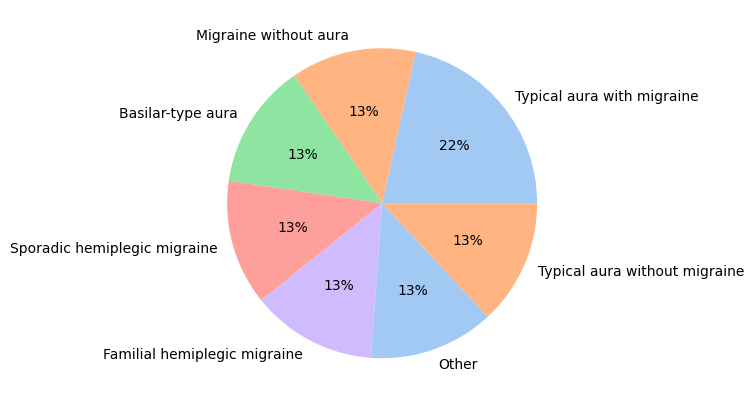

In [ ]:
plt.figure(figsize=(5, 8))
data =train_dataset['Type'].value_counts()
labels =['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
X = train_dataset.drop('Type', axis=1)
Y = train_dataset['Type']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier(n_estimators=130)
gbdt.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=130)

**RANDOM FOREST**

In [ ]:
rf = RandomForestClassifier()
# fit the model
rf.fit(X_train, Y_train)


cross_val_score(rf, X_train, Y_train, cv=100, scoring="accuracy").mean()
print('Accuracy of Random Forest on training dataset: %.5f' % rf.score(X_train, Y_train))
print('Accuracy of Random Forest on test dataset: %.2f' % rf.score(X_test,Y_test))

Accuracy of Random Forest on training dataset: 1.00000
Accuracy of Random Forest on test dataset: 0.98


**DECISION TREE**

In [ ]:
dt = DecisionTreeClassifier ()
dt.fit(X_train,Y_train)
pred=dt.predict(X_test)

cross_val_score(dt, X_train, Y_train, cv=100, scoring="accuracy").mean()
print('Accuracy of Decision Tree on training dataset: %.5f' % dt.score(X_train, Y_train))
print('Accuracy of Decision Tree on test dataset: %.2f' % dt.score(X_test,Y_test))

Accuracy of Decision Tree on training dataset: 1.00000
Accuracy of Decision Tree on test dataset: 0.99


**K NEAREST NEIGHBORS**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
cross_val_score(knn, X_train, Y_train, cv=100, scoring="accuracy").mean()
print('Accuracy of Decision Tree on training dataset: %.5f' % knn.score(X_train, Y_train))
print('Accuracy of Decision Tree on test dataset: %.2f' % knn.score(X_test,Y_test))


Accuracy of Decision Tree on training dataset: 0.76227
Accuracy of Decision Tree on test dataset: 0.70


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(SVC())
ovr_classifier.fit(X_train, Y_train)
p = ovr_classifier.predict(X_test)
print('Accuracy of SVC on training dataset: %.5f' % ovr_classifier.score(X_train, Y_train))
print('Accuracy of SVC on test dataset: %.2f' % ovr_classifier.score(X_test,Y_test))

Accuracy of SVC on training dataset: 0.76663
Accuracy of SVC on test dataset: 0.77


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(X_train,Y_train)

print('Accuracy of logical regression on training dataset: %.5f' % l1.score(X_train, Y_train))
print('Accuracy of logical regression on test dataset: %.2f' % l1.score(X_test,Y_test))


Accuracy of logical regression on training dataset: 0.90076
Accuracy of logical regression on test dataset: 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**GAUSSIAN**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)

print('Accuracy of logical regression on training dataset: %.5f' % nb.score(X_train, Y_train))
print('Accuracy of logical regression on test dataset: %.2f' % nb.score(X_test,Y_test))


Accuracy of logical regression on training dataset: 0.88768
Accuracy of logical regression on test dataset: 0.90


**GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier(n_estimators=70)
gbdt.fit(X_train,Y_train)
gbdt.score(X_train,Y_train)

0.9978189749182116

In [ ]:
gbdt.score(X_test,Y_test)*100

96.95652173913044

In [ ]:
mig=pd.read_csv('data.csv')

In [ ]:
X=mig.drop('Type', axis=1)
Y=mig['Type']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

**RANDOM FOREST**

In [ ]:
rf = RandomForestClassifier()
# fit the model
rf.fit(X_train, Y_train)
pred =rf.predict(X_test)

cross_val_score(rf, X_train, Y_train, cv=80, scoring="accuracy").mean()
print('Accuracy of Random Forest on training dataset: %.5f' % rf.score(X_train, Y_train))
print('Accuracy of Random Forest on test dataset: %.2f' % rf.score(X_test,Y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=80.
  warnings.warn(


Accuracy of Random Forest on training dataset: 1.00000
Accuracy of Random Forest on test dataset: 0.88


**DECISION TREE**

In [ ]:
dt = DecisionTreeClassifier ()
dt.fit(X_train,Y_train)
pred =dt.predict(X_test)
cross_val_score(dt, X_train, Y_train, cv=100, scoring="accuracy").mean()
print('Accuracy of Decision Tree on training dataset: %.5f' % dt.score(X_train, Y_train))
print('Accuracy of Decision Tree on test dataset: %.2f' % dt.score(X_test,Y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=100.
  warnings.warn(


Accuracy of Decision Tree on training dataset: 1.00000
Accuracy of Decision Tree on test dataset: 0.84
